In [1]:
import os
import cv2 as cv
import glob as gb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import Model, layers, Sequential, optimizers
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow import keras
from tensorflow.keras import callbacks, layers, Model
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [2]:
train_dir= '../input/animals-detection-images-dataset/train'
test_dir='../input/animals-detection-images-dataset/test'

# Exploratory data analysis

training data size : 7496


<BarContainer object of 25 artists>

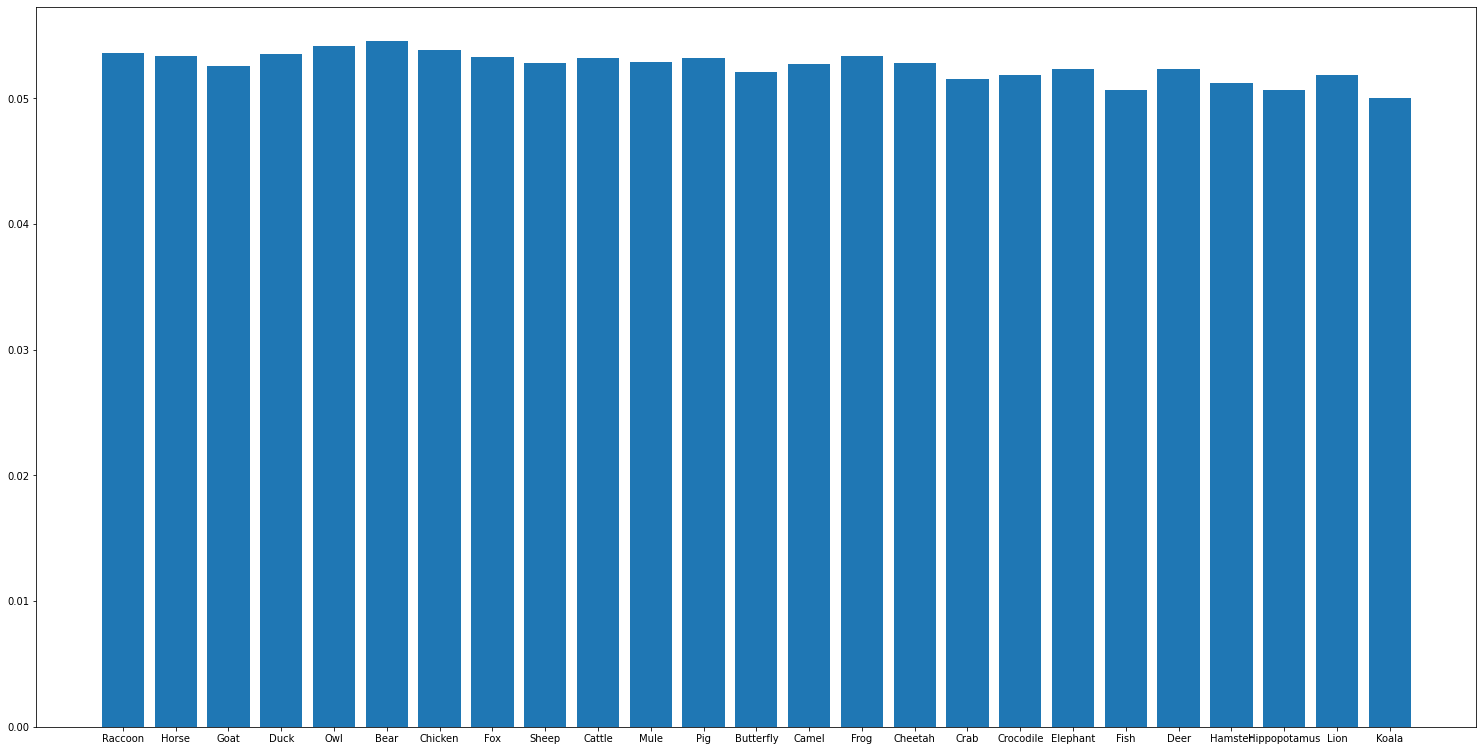

In [3]:
training_images_files_names_raccoon = len(os.listdir("../input/animals-detection-images-dataset/train/Raccoon"))-1
training_images_files_names_horses = len(os.listdir("../input/animals-detection-images-dataset/train/Horse"))-1
training_images_files_names_goat = len(os.listdir("../input/animals-detection-images-dataset/train/Goat"))-1
training_images_files_names_mule = len(os.listdir("../input/animals-detection-images-dataset/train/Mule"))-1
training_images_files_names_duck = len(os.listdir("../input/animals-detection-images-dataset/train/Duck"))-1
training_images_files_names_owl = len(os.listdir("../input/animals-detection-images-dataset/train/Owl"))-1
training_images_files_names_bear = len(os.listdir("../input/animals-detection-images-dataset/train/Bear"))-1
training_images_files_names_chicken = len(os.listdir("../input/animals-detection-images-dataset/train/Chicken"))-1
training_images_files_names_fox = len(os.listdir("../input/animals-detection-images-dataset/train/Fox"))-1
training_images_files_names_pig = len(os.listdir("../input/animals-detection-images-dataset/train/Pig"))-1
training_images_files_names_sheep = len(os.listdir("../input/animals-detection-images-dataset/train/Sheep"))-1
training_images_files_names_cattle = len(os.listdir("../input/animals-detection-images-dataset/train/Cattle"))-1

training_images_files_names_Butterfly = len(os.listdir("../input/animals-detection-images-dataset/train/Butterfly"))-1
training_images_files_names_Camel = len(os.listdir("../input/animals-detection-images-dataset/train/Camel"))-1
training_images_files_names_Frog = len(os.listdir("../input/animals-detection-images-dataset/train/Frog"))-1
training_images_files_names_Cheetah = len(os.listdir("../input/animals-detection-images-dataset/train/Cheetah"))-1
training_images_files_names_Crab = len(os.listdir("../input/animals-detection-images-dataset/train/Crab"))-1
training_images_files_names_Crocodile = len(os.listdir("../input/animals-detection-images-dataset/train/Crocodile"))-1
training_images_files_names_Elephant = len(os.listdir("../input/animals-detection-images-dataset/train/Elephant"))-1
training_images_files_names_Fish = len(os.listdir("../input/animals-detection-images-dataset/train/Fish"))-1
training_images_files_names_Deer = len(os.listdir("../input/animals-detection-images-dataset/train/Deer"))-1
training_images_files_names_Hamster = len(os.listdir("../input/animals-detection-images-dataset/train/Hamster"))-1
training_images_files_names_Hippopotamus = len(os.listdir("../input/animals-detection-images-dataset/train/Hippopotamus"))-1
training_images_files_names_Lion = len(os.listdir("../input/animals-detection-images-dataset/train/Lion"))-1
training_images_files_names_Koala = len(os.listdir("../input/animals-detection-images-dataset/train/Koala"))-1

# print("Butterfly sample size : ",training_images_files_names_Butterfly,"\n")
# print("Camel sample size : ",training_images_files_names_Camel,"\n")
# print("Frog sample size : ",training_images_files_names_Frog,"\n")
# print("Cheetah sample size : ",training_images_files_names_Cheetah,"\n")
# print("Crab sample size : ",training_images_files_names_Crab,"\n")
# print("Crocodile sample size : ",training_images_files_names_Crocodile,"\n")
# print("Elephant sample size : ",training_images_files_names_Elephant,"\n")
# print("Fish sample size : ",training_images_files_names_Fish,"\n")
# print("Deer sample size : ",training_images_files_names_Deer,"\n")
# print("Hamster sample size : ",training_images_files_names_Hamster,"\n")
# print("Hippopotamus sample size : ",training_images_files_names_Hippopotamus,"\n")
# print("Lion sample size : ",training_images_files_names_Lion,"\n")
# print("Koala sample size : ",training_images_files_names_Koala,"\n")

training_data_size = training_images_files_names_raccoon+training_images_files_names_horses+training_images_files_names_goat+training_images_files_names_mule+training_images_files_names_duck+training_images_files_names_owl+training_images_files_names_bear+training_images_files_names_chicken+training_images_files_names_fox+training_images_files_names_pig+training_images_files_names_sheep+training_images_files_names_cattle + training_images_files_names_Butterfly+training_images_files_names_Camel+training_images_files_names_Frog+training_images_files_names_Cheetah+training_images_files_names_Crab+training_images_files_names_Crocodile+training_images_files_names_Elephant+training_images_files_names_Fish+training_images_files_names_Deer+training_images_files_names_Hamster+training_images_files_names_Hippopotamus+training_images_files_names_Lion+training_images_files_names_Koala
occurences = [training_images_files_names_raccoon*3.9/training_data_size ,training_images_files_names_horses/training_data_size ,training_images_files_names_goat*1.95/training_data_size ,(training_images_files_names_duck/1.35)/training_data_size ,training_images_files_names_owl/training_data_size ,training_images_files_names_bear*4.7/training_data_size ,training_images_files_names_chicken*1.04/training_data_size,training_images_files_names_fox*2.7/training_data_size,training_images_files_names_sheep*4/training_data_size,training_images_files_names_cattle*5.7/training_data_size,training_images_files_names_mule*6.5/training_data_size,training_images_files_names_pig*2.1/training_data_size,(training_images_files_names_Butterfly/4.8)/training_data_size,training_images_files_names_Camel*5.9/training_data_size, (training_images_files_names_Frog/1.47)/training_data_size, training_images_files_names_Cheetah*3/training_data_size, training_images_files_names_Crab*1.25/training_data_size, training_images_files_names_Crocodile*3.6/training_data_size, training_images_files_names_Elephant*2.53/training_data_size, (training_images_files_names_Fish/2.2)/training_data_size, training_images_files_names_Deer*1.2/training_data_size, training_images_files_names_Hamster*6/training_data_size, training_images_files_names_Hippopotamus*5/training_data_size, training_images_files_names_Lion*1.87/training_data_size, training_images_files_names_Koala*6.7/training_data_size]
print("training data size :",training_data_size)
fig = plt.figure(figsize=[20,10])
ax = fig.add_axes([0,0,1,1])
ax.bar(["Raccoon","Horse","Goat","Duck","Owl","Bear","Chicken","Fox","Sheep","Cattle","Mule","Pig","Butterfly","Camel","Frog","Cheetah","Crab","Crocodile","Elephant","Fish","Deer","Hamster","Hippopotamus","Lion","Koala"],occurences)

    

## **2 YOLOv5** 

# 2.1  preparing folders config

In [4]:
animals_to_detect = ["Cattle","Pig","Horse","Sheep","Goat","Chicken","Mule","Duck","Fox","Raccoon","Bear","Owl","Butterfly","Camel","Frog","Cheetah","Crab","Crocodile","Elephant","Fish","Deer","Hamster","Hippopotamus","Lion","Koala"]


In [5]:
os.mkdir("yolo")
os.mkdir("yolo/test")
os.mkdir("yolo/test/images")
os.mkdir("yolo/test/labels")
os.mkdir("yolo/train")
os.mkdir("yolo/train/images")
os.mkdir("yolo/train/labels")

In [6]:
!cd ./
!ls

__notebook__.ipynb  yolo


In [7]:
size = (640,640)
for animal_specie in animals_to_detect:
    image_file_name = os.listdir(train_dir+"/"+animal_specie)
    for i in range(0,len(image_file_name)):
            if image_file_name[i] != "Label":
                img = cv2.imread(train_dir+"/"+animal_specie+"/"+image_file_name[i], cv2.IMREAD_COLOR)
                img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, size)
                cv2.imwrite("yolo/train/images/"+image_file_name[i], img) 

    image_file_name = os.listdir(test_dir+"/"+animal_specie)
    for i in range(0,len(image_file_name)):
            if image_file_name[i] != "Label":
                img = cv2.imread(test_dir+"/"+animal_specie+"/"+image_file_name[i], cv2.IMREAD_COLOR)
                img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, size)
                cv2.imwrite("yolo/test/images/"+image_file_name[i], img) 

# 2.2 Labels files processing

In [8]:
animals_to_detect = ["Cattle","Pig","Horse","Sheep","Goat","Chicken","Mule","Duck","Fox","Raccoon","Bear","Owl","Butterfly","Camel","Frog","Cheetah","Crab","Crocodile","Elephant","Fish","Deer","Hamster","Hippopotamus","Lion","Koala"]
animals_encoding = {"Cattle":0,"Pig":1,"Horse":2,"Sheep":3,"Goat":4,"Chicken":5,"Mule":6,"Duck":7,"Fox":8,"Raccoon":9,"Bear":10,"Owl":11,"Butterfly":12,"Camel":13,"Frog":14,"Cheetah":15,"Crab":16,"Crocodile":17,"Elephant":18,"Fish":19,"Deer":20,"Hamster":21,"Hippopotamus":22,"Lion":23,"Koala":24}

In [9]:
def process_files(input_files_path,output_files_path):
    for animal_specie in animals_to_detect:
        txt_file_name = os.listdir(input_files_path+"/"+animal_specie+"/Label")
        for i in range(0,len(txt_file_name)):
                with open(input_files_path+"/"+animal_specie + "/Label/" + txt_file_name[i], "r") as source:
                       with open(output_files_path+"/"+ txt_file_name[i], "w") as destination :
                            image_file_name_no_ext = txt_file_name[i][0:len(txt_file_name[i])-4]
                            img = cv2.imread(input_files_path+"/"+animal_specie+"/"+image_file_name_no_ext+".jpg", cv2.IMREAD_COLOR)
                            height = img.shape[0]
                            width = img.shape[1]
                            for line in source:
                                        labeling_data = line.split()
                                        labeling_data[0] = animals_encoding[labeling_data[0]]
                                        xmin = float(labeling_data[1])
                                        ymin = float(labeling_data[2])
                                        xmax = float(labeling_data[3])
                                        ymax = float(labeling_data[4])
                                        cx = (xmin + xmax)/2.0/width
                                        cy = (ymin + ymax)/2.0/height
                                        box_width = (xmax - xmin)/width
                                        box_height = (ymax - ymin)/height
                                        destination.write(str(labeling_data[0])+" ")
                                        destination.write(str(cx)+" ")
                                        destination.write(str(cy)+" ")
                                        destination.write(str(box_width)+" ")
                                        destination.write(str(box_height)+"\n")




In [10]:
process_files("../input/animals-detection-images-dataset/train","yolo/train/labels")
#process_data("../input/animals-detection-images-dataset/train")


In [11]:
process_files("../input/animals-detection-images-dataset/test","yolo/test/labels")


# Cloning yolov5 repo

In [12]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 15701, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 15701 (delta 7), reused 17 (delta 5), pack-reused 15672
Receiving objects: 100% (15701/15701), 14.49 MiB | 24.24 MiB/s, done.
Resolving deltas: 100% (10748/10748), done.
/kaggle/working/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.4/587.4 kB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 49.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.8/61.8 MB 19.8 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 59.8.0
    Uninstalling setuptools-59.8.0:
      Successfully uninstalled setuptools-59.8.0
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.5.4.60
    Uninstalling opencv-python-4.5.4.60:
   

# Create YAML file

In [13]:
%ls

CITATION.cff     README.zh-CN.md  detect.py   requirements.txt  tutorial.ipynb
CONTRIBUTING.md  benchmarks.py    export.py   segment/          utils/
LICENSE          classify/        hubconf.py  setup.cfg         val.py
README.md        data/            models/     train.py


In [14]:
!cat data/coco128.yaml


# YOLOv5 🚀 by Ultralytics, AGPL-3.0 license
# COCO128 dataset https://www.kaggle.com/ultralytics/coco128 (first 128 images from COCO train2017) by Ultralytics
# Example usage: python train.py --data coco128.yaml
# parent
# ├── yolov5
# └── datasets
#     └── coco128  ← downloads here (7 MB)


# Train/val/test sets as 1) dir: path/to/imgs, 2) file: path/to/imgs.txt, or 3) list: [path/to/imgs1, path/to/imgs2, ..]
path: ../datasets/coco128  # dataset root dir
train: images/train2017  # train images (relative to 'path') 128 images
val: images/train2017  # val images (relative to 'path') 128 images
test:  # test images (optional)

# Classes
names:
  0: person
  1: bicycle
  2: car
  3: motorcycle
  4: airplane
  5: bus
  6: train
  7: truck
  8: boat
  9: traffic light
  10: fire hydrant
  11: stop sign
  12: parking meter
  13: bench
  14: bird
  15: cat
  16: dog
  17: horse
  18: sheep
  19: cow
  20: elephant
  21: bear
  22: zebra
  23: giraffe
  24: backpack
  25: umbrella
  26: handb

In [15]:
!touch data/animals.yaml
%ls data

Argoverse.yaml        SKU-110K.yaml  coco.yaml         images/
GlobalWheat2020.yaml  VOC.yaml       coco128-seg.yaml  scripts/
ImageNet.yaml         VisDrone.yaml  coco128.yaml      xView.yaml
Objects365.yaml       animals.yaml   hyps/


Content of the animals.yaml file, we will start filling the yaml file with the red-colored content presented below 

In [16]:
with open("data/animals.yaml", "w") as yaml_file:
    yaml_file.write("path: ../yolo  # train images (relative to 'path') 128 images"+"\n")
    yaml_file.write("train: train/images  # train images (relative to 'path') 128 images"+"\n")
    yaml_file.write("val: test/images  # val images (relative to 'path') 128 images"+"\n")
    yaml_file.write("names:"+"\n")
    yaml_file.write(" 0: Cattle"+"\n")
    yaml_file.write(" 1: Pig"+"\n")
    yaml_file.write(" 2: Horse"+"\n")
    yaml_file.write(" 3: Sheep"+"\n")
    yaml_file.write(" 4: Goat"+"\n")
    yaml_file.write(" 5: Chicken"+"\n")
    yaml_file.write(" 6: Mule"+"\n")
    yaml_file.write(" 7: Duck"+"\n")
    yaml_file.write(" 8: Fox"+"\n")
    yaml_file.write(" 9: Raccoon"+"\n")
    yaml_file.write(" 10: Bear"+"\n")
    yaml_file.write(" 11: Owl"+"\n")
    
    yaml_file.write(" 12: Butterfly"+"\n")
    yaml_file.write(" 13: Camel"+"\n")
    yaml_file.write(" 14: Frog"+"\n")
    yaml_file.write(" 15: Cheetah"+"\n")
    yaml_file.write(" 16: Crab"+"\n")
    yaml_file.write(" 17: Crocodile"+"\n")
    yaml_file.write(" 18: Elephant"+"\n")
    yaml_file.write(" 19: Fish"+"\n")
    yaml_file.write(" 20: Deer"+"\n")
    yaml_file.write(" 21: Hamster"+"\n")
    yaml_file.write(" 22: Hippopotamus"+"\n")
    yaml_file.write(" 23: Lion"+"\n")
    yaml_file.write(" 24: Koala"+"\n")


# model Training

In [17]:
!ls

CITATION.cff	 README.zh-CN.md  detect.py   requirements.txt	tutorial.ipynb
CONTRIBUTING.md  benchmarks.py	  export.py   segment		utils
LICENSE		 classify	  hubconf.py  setup.cfg		val.py
README.md	 data		  models      train.py


## 

In [18]:
!python train.py --img 640 --batch 16 --epochs 100 --data animals.yaml --weights yolov5s.pt --project runs/train

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
train: weights=yolov5s.pt, cfg=, data=animals.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralyti

# Synthesis

In [19]:
results_yolov5s = os.listdir("runs/train/exp")

In [20]:
%ls runs/train/exp/weights

best.pt  last.pt


In [21]:
%ls runs/train/exp

F1_curve.png                                       results.png
PR_curve.png                                       train_batch0.jpg
P_curve.png                                        train_batch1.jpg
R_curve.png                                        train_batch2.jpg
confusion_matrix.png                               val_batch0_labels.jpg
events.out.tfevents.1684827754.18c50a992537.421.0  val_batch0_pred.jpg
hyp.yaml                                           val_batch1_labels.jpg
labels.jpg                                         val_batch1_pred.jpg
labels_correlogram.jpg                             val_batch2_labels.jpg
opt.yaml                                           val_batch2_pred.jpg
results.csv                                        weights/


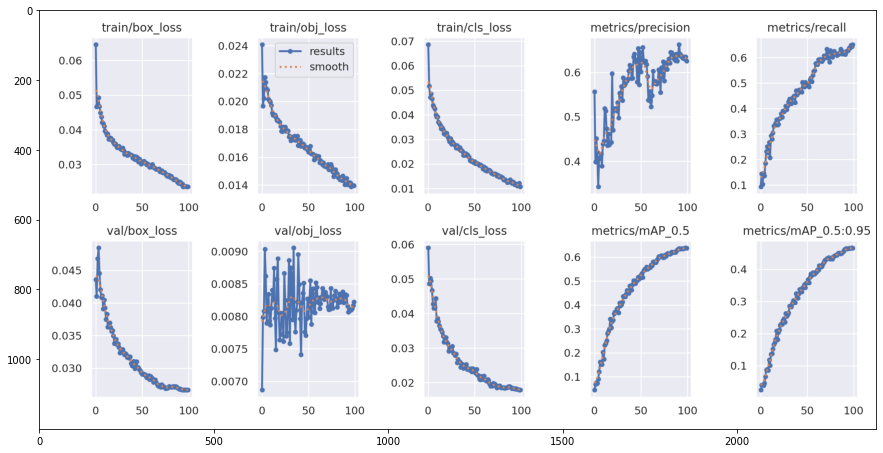

In [22]:
img = mpimg.imread('runs/train/exp/results.png')
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
imgplot = plt.imshow(img)
plt.show()

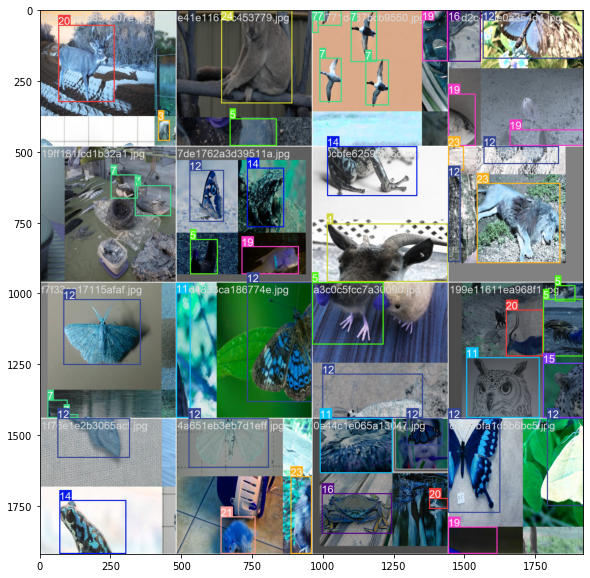

In [23]:
img = mpimg.imread('runs/train/exp/train_batch0.jpg')
figure_size = 10
plt.figure(figsize=(figure_size,figure_size))
imgplot = plt.imshow(img)
plt.show()

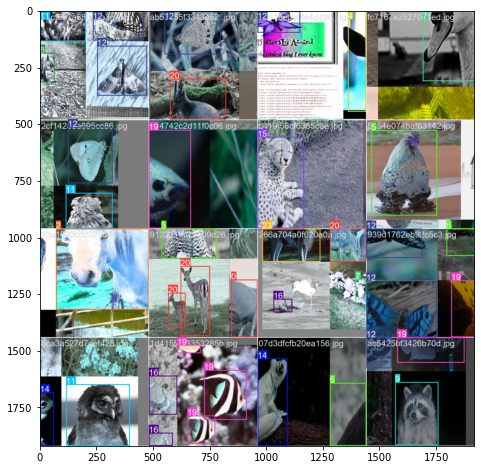

In [24]:
img = mpimg.imread('runs/train/exp/train_batch1.jpg')
figure_size = 8
plt.figure(figsize=(figure_size,figure_size))
imgplot = plt.imshow(img)
plt.show()

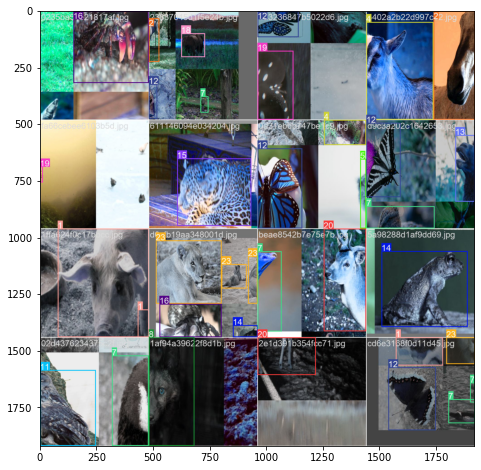

In [25]:
img = mpimg.imread('runs/train/exp/train_batch2.jpg')
figure_size = 8
plt.figure(figsize=(figure_size,figure_size))
imgplot = plt.imshow(img)
plt.show()

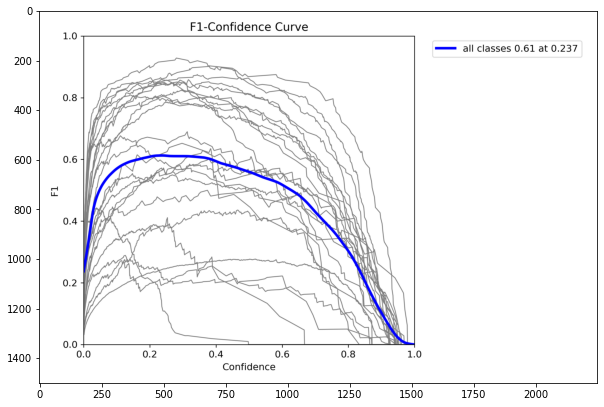

In [26]:
img = mpimg.imread('runs/train/exp/F1_curve.png')
figure_size = 10
plt.figure(figsize=(figure_size,figure_size))
imgplot = plt.imshow(img)
plt.show()

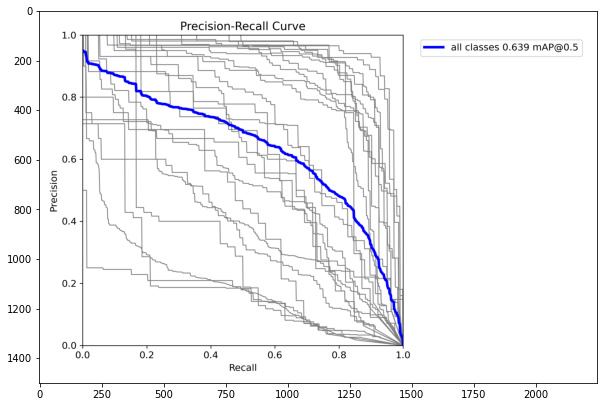

In [27]:
img = mpimg.imread('runs/train/exp/PR_curve.png')
figure_size = 10
plt.figure(figsize=(figure_size,figure_size))
imgplot = plt.imshow(img)
plt.show()

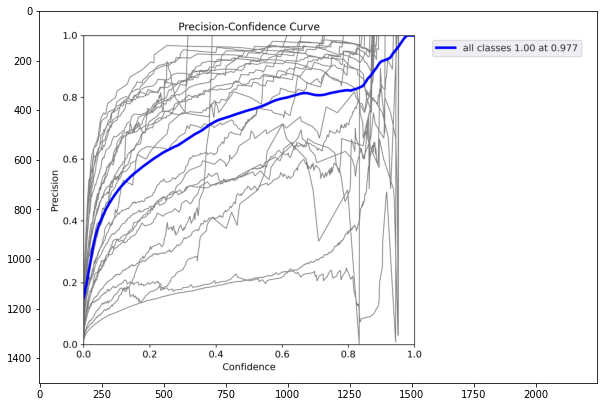

In [28]:
img = mpimg.imread('runs/train/exp/P_curve.png')
figure_size = 10
plt.figure(figsize=(figure_size,figure_size))
imgplot = plt.imshow(img)
plt.show()

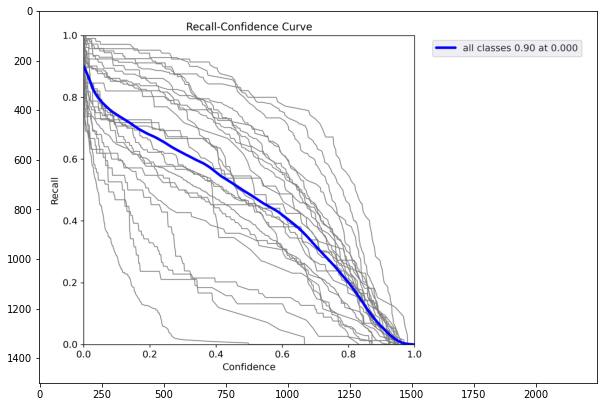

In [29]:
img = mpimg.imread('runs/train/exp/R_curve.png')
figure_size = 10
plt.figure(figsize=(figure_size,figure_size))
imgplot = plt.imshow(img)
plt.show()

In [30]:
import os 
os.chdir(r'/kaggle/working')

In [31]:
%ls /kaggle/working/yolov5/runs

train/
